# Assignment 2 - Logistic Regression 

Machine learning is used in medicine for assisting doctors with crucial decision-making based on dignostic data. 
In this assignment we will be designing a logistic regression model (single layer neural network) to predict if a subject is diabetic or not. The model will classify the subjects into two groups diabetic (Class 1) or non-diabetic (Class 0) - a binary classification model.

We will be using the 'Pima Indians Diabetes dataset' to train our model which contains different clinical parameters (features) for multiple subjects along with the label (diabetic or not-diabetic). Each  subject is represented by 8 features (Pregnancies, Glucose, Blood-Pressure, SkinThickness, Insulin, BMI, Diabetes-Pedigree-Function, Age) and the 'Outcome' which is the class label. The dataset contains the results from 768 subjects.

We will be spliting the dataset into train and test data. We will train our model on the train data and predict the categories on the test data. 

The notebook has startup code. You will fill in your code between

\### BEGIN SOLUTION \###


\### END SOLUTION \###


In [1]:
#importing a few libraries
import numpy as np
from datasets import pima_data
import sys
import matplotlib.pyplot as plt
import numpy.testing as npt

## 1. Load Data, Visualize and Normalize

Let us load the training and test data.

In [2]:
train_X,train_Y,test_X,test_Y  = pima_data()

print('train_X.shape = ', train_X.shape)
print('train_Y.shape = ', train_Y.shape)
print('test_X.shape = ', test_X.shape)
print('test_Y.shape = ', test_Y.shape)

# Lets examine the data
print('\nFew Train data examples')
print(train_X[:5, :])
print('\nFew Train data labels')
print(train_Y[:5])

train_X.shape =  (500, 8)
train_Y.shape =  (500,)
test_X.shape =  (268, 8)
test_Y.shape =  (268,)

Few Train data examples
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]

Few Train data labels
[1. 0. 1. 0. 1.]


In [3]:
# We notice the data is not normalized. Lets do a simple normalization scaling to data between 0 and 1
# Normalized data is easier to train using large learning rates
train_X = np.nan_to_num(train_X/train_X.max(axis=0))
test_X = np.nan_to_num(test_X/test_X.max(axis=0))

#Lets reshape the data so it matches our notation from the lecture. 
#train_X should be (d, m) and train_Y should (1,m) similarly for test_X and test_Y
train_X = train_X.T
train_Y= train_Y.reshape(1,-1)

test_X = test_X.T
test_Y= test_Y.reshape(1,-1)
print('train_X.shape = ', train_X.shape)
print('train_Y.shape = ', train_Y.shape)
print('test_X.shape = ', test_X.shape)
print('test_Y.shape = ', test_Y.shape)

# Lets examine the data and verify it is normalized
print('\nFew Train data examples')
print(train_X[:, :5])
print('\nFew Train data labels')
print(train_Y[0,:5])

train_X.shape =  (8, 500)
train_Y.shape =  (1, 500)
test_X.shape =  (8, 268)
test_Y.shape =  (1, 268)

Few Train data examples
[[0.35294118 0.05882353 0.47058824 0.05882353 0.        ]
 [0.74371859 0.42713568 0.91959799 0.44723618 0.68844221]
 [0.59016393 0.54098361 0.52459016 0.54098361 0.32786885]
 [0.35353535 0.29292929 0.         0.23232323 0.35353535]
 [0.         0.         0.         0.11111111 0.19858156]
 [0.50074516 0.39642325 0.34724292 0.41877794 0.64232489]
 [0.25909091 0.14504132 0.27768595 0.06900826 0.94545455]
 [0.61728395 0.38271605 0.39506173 0.25925926 0.40740741]]

Few Train data labels
[1. 0. 1. 0. 1.]


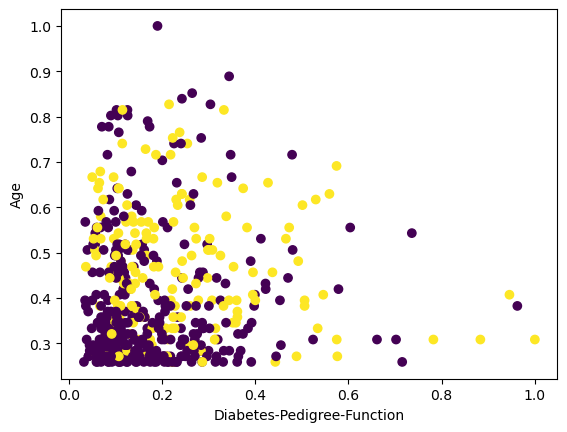

In [4]:
#There are 8 features for each of the data points. Lets plot the data using a couple of features
fig, ax = plt.subplots()
plt.scatter(train_X[6,:],train_X[7,:], c=train_Y[0])
plt.xlabel('Diabetes-Pedigree-Function')
plt.ylabel('Age')
plt.show()
# We have plotted train_X[6,:],train_X[7,:]. 
# Feel free to insert your own cells to plot and visualize different variable pairs. 

## 2. Quick Review of the Steps Involved in Logistic Regression Using Gradient Descent.

1. Training data $X$ is of dimensions $(d \times m)$ where $d$ is number of features and $m$ is number of samples. Training labels $Y$ is of dimensions $(1 \times m)$. 

2. Initilaize logistic regression model parameters $w$ and $b$ where $w$ is of dimensions $(d, 1)$ and $b$ is a scalar. $w$ is initialized to small random values and $b$ is set to zero

3. Calculate $Z$ using $X$ and intial parameter values $(w , b)$ 
<center> 
    \begin{equation*}
     Z= w^\top X + b
    \end{equation*}
</center>

4. Apply the sigmoid activation to estimate $A$ using $Z$,
<center> 
    \begin{equation*}
     A=\frac{1}{1+\text{exp}(-Z)}
    \end{equation*}
</center>

5. Calculate the loss $L()$ between predicted probabilities $A$ and groundtruth labels $Y$,
<center> 
    \begin{equation*}
     loss = logistic\_loss(A,Y)
    \end{equation*}
</center>

4. Calculate gradient dZ (or $\frac{dL}{dZ}$),
<center> 
    \begin{equation*}
     dZ = (A - Y)
    \end{equation*}
</center>

5. Calculate gradients $\frac{dL}{dw}$ represented by $dw$, $\frac{dL}{db}$ represented by $db$
<center> 
    \begin{equation*}
     dw,db = grad\_fn(X ,dZ)
    \end{equation*}
</center>
6. Update the model parameters using the gradients. Here $\alpha$ is the learning rate.
<center> 
    \begin{equation*}
     w := w - \alpha.dw\\
     b := b - \alpha.db
    \end{equation*}
</center>
7. Loop until the loss converges or for a fixed number of epochs. 
We will first define the functions **logistic_loss()** and **grad_fn()** along with other functions below. 

### Intialize Parameters (10 Points)

We first initialize the model parameters. The weights will be initialized with small random values and bias as 0. While the bias will be a scalar, the dimension of weight vector will be $(d \times 1)$, where $d$ is the number of features.

Hint:[np.random.randn](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html) can be used here to create a vector of random integers of desired shape.

In [5]:
def initialize(d, seed=1):
    '''
    Function to initialize the parameters for the logisitic regression model
    
    Inputs:
        d: number of features for every data point
        seed: random generator seed for reproducing the results
        
    Outputs:
        w: weight vector of dimensions (d, 1)
        b: scalar bias value
    '''
    np.random.seed(seed)
    
    # NOTE: initialize w to be a (d,1) column vector instead of (d,) vector 
    # Hint: initialize w to a random vector with small values. For example, 0.01*np.random.randn(.) can be used.
    #       and initialize b to scalar 0
    
    ### BEGIN SOLUTION ###
    w = np.random.randn(d, 1)*0.01
    b = 0
    ### END SOLUTION ###
    
    return w,b

### Sigmoid Function (10 Points)

Let's now implement Sigmoid activation function.

<center> 
    \begin{equation*}
    \sigma \left(z\right) = \frac{1}{1+\text{exp}(-z)}
    \end{equation*}
</center>

where z is in the input variable.
Hint: [numpy.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) can be used for defining the exponential function.

In [6]:
def sigmoid(Z):
    
    ### BEGIN SOLUTION ###
    A = 1/(1+np.exp(-1*Z))
    ### END SOLUTION ###
    return A

### Logistic Loss Function (10 Points)

We will define the objective function that will be used later for determining the loss between the model prediction and groundtruth labels. We will use vectors $A$ (activation output of the logistic neuron) and $Y$ (groundtruth labels) for defining the loss. 

<center> 
    \begin{equation*}
    L(A,Y) = -\frac{1}{m}\sum_{i =1}^{m}y^{(i)}\text{log} a^{(i)} + (1-y^{(i)}) \text{log}( 1 - a^{(i)})
    \end{equation*}
</center>

where $m$ is the number of input datapoints and is used for averaging the total loss.
Hint: [numpy.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) and [numpy.log](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html).

In [7]:
def logistic_loss(A,Y):
    '''
    Function to calculate the logistic loss given the predictions and the targets.
    Inputs:
        A: Estimated prediction values, A is of dimension (1, m)
        Y: groundtruth labels, Y is of dimension (1, m)
    Outputs:
        loss: logistic loss
    '''
    m = A.shape[1]
    
    ### BEGIN SOLUTION ###
    vals = []
    for each in range(m):
        vals.append(Y[0][each]*np.log(A[0][each])+(1-Y[0][each])*np.log(1-A[0][each]))
    loss = -1*np.sum(vals)/m
    ### END SOLUTION ###
    
    return loss

### Gradient Function (10 Points)

Let us define the gradient function for calculating the gradients ($\frac{dL}{dw},\frac{dL}{db}$). We will use it during gradient descent.

The gradients can be calculated as,
<center> 
    \begin{equation*}
    dw = \frac{1}{m}X( A- Y)^{T}\\
    db = \frac{1}{m}\sum_{i =1}^{m} (a^{(i)} - y^{(i)})
    \end{equation*}
</center>

Instead of $(A-Y)$, we will use dZ (or $\frac{dL}{dZ}$) since,
<center> 
    \begin{equation*}
    dZ = \left( A- Y\right)
    \end{equation*}
</center>
Make sure the gradients are of correct dimensions. 
We can multiply $dZ$ with $\frac{1}{m}$ and not have the $\frac{1}{m}$ factor for $dw$ and $db$. But, we will implement what we discussed in class. Refer to lecture for more information.

Hint: [numpy.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) and
[numpy.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html). Check use of 'keepdims' parameter.

In [8]:
def grad_fn(X,dZ):
    '''
    Function to calculate the gradients of weights (dw) and biases (db) w.r.t the objective function L.
    
    Inputs:
        X: training data of dimensions (d, m)
        dZ: gradient dL/dZ where L is the logistic loss and Z = w^T*X+b 
            dZ is of dimensions (1, m)
        
    outputs:
        dw: gradient dL/dw - gradient of the weight w.r.t. the logistic loss. It is of dimensions (d,1)
        db: gradient dL/db - gradient of the bias w.r.t. the logistic loss. It is a scalar
    '''
    m = X.shape[1]
    
    ### BEGIN SOLUTION ###
    dw = np.dot(X, dZ.T)/m
    db = np.sum(dZ)/m
    ### END SOLUTION ###

    return dw,db

### Training the Model (20 Points)

We will now implement the steps for gradient descent discussed earlier. We will fix the number of training iterations.

In [9]:
def model_fit(w,b,X,Y,alpha,n_epochs,log=False):
    '''
    Function to fit a logistic model with the parameters w,b to the training data with labels X and Y.
    
    Inputs:
        w: weight vector of dimensions (d, 1)
        b: scalar bias value
        X: training data of dimensions (d, m)
        Y: training data labels of dimensions (1, m)
        alpha: learning rate
        n_epochs: number of epochs to train the model
        
    Outputs:
        params: a dictionary to hold parameters w and b
        losses: a list train loss at every epoch
    '''
    losses=[]
    for epoch in range(n_epochs):
        
        # Implement the steps in the logistic regression using the functions defined earlier.
        # For each iteration of the for loop
            # Step 1: Calculate output Z = w.T*X + b
            # Step 2: Apply sigmoid activation: A = sigmoid(Z)
            # Step 3: Calculate loss = logistic_loss(.) between predicted values A and groundtruth labels Y
            # Step 4: Estimate gradient dZ = A-Y
            # Step 5: Estimate gradients dw and db using grad_fn(.).
            # Step 6: Update parameters w and b using gradients dw, db and learning rate
            #         w = w - alpha * dw
            #         b = b - alpha * db

        ### BEGIN SOLUTION ###
        Z = np.dot(w.T, X) + b
        A = sigmoid(Z)
        loss = logistic_loss(A, Y)
        dZ = A-Y
        dw, db = grad_fn(X, dZ)
        w -= alpha*dw
        b -= alpha*db
        ### END SOLUTION ###
        if epoch%100 == 0:
            losses.append(loss)
            if log == True:
                print("After %i iterations, Loss = %f"%(epoch,loss))
    params ={"w":w,"b":b}
    
    return params,losses    

### Model Prediction (20 Points)

Once we have the optimal values of model parameters $(w,b)$, we can determine the accuracy of the model on the test data.
<center> 
    \begin{equation*}
     Z = w^{T}X + b\\
     A=\sigma\left(Z\right)  
    \end{equation*}
</center>

In [10]:
def model_predict(params,X,Y=np.array([]),pred_threshold=0.5):
    '''
    Function to calculate category predictions on given data and returns the accuracy of the predictions.
    Inputs:
        params: a dictionary to hold parameters w and b
        X: training data of dimensions (d, m)
        Y: training data labels of dimensions (1, m). If not provided, the function merely makes predictions on X
        
    outputs:
        Y_Pred: Predicted class labels for X. Has dimensions (1, m)
        acc: accuracy of prediction over X if Y is provided else, 0 
        loss: loss of prediction over X if Y is provided else, Inf  
    '''
    w = params['w']
    b = params['b']
    m = X.shape[1]
    
    # Calculate Z using X, w and b
    # Calculate A using the sigmoid - A is the set of (1,m) probabilities
    # Calculate the prediction labels Y_Pred of size (1,m) using A and pred_threshold 
    # When A>pred_threshold Y_Pred is 1 else 0
    ### BEGIN SOLUTION ###
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    Y_Pred = []
    for each in A[0]:
        if each > pred_threshold:
            Y_Pred.append(1)
        else:
            Y_Pred.append(0)
    ### END SOLUTION ###
    acc = 0
    loss = float('inf')
    if Y.size!=0:
        loss = logistic_loss(A,Y)
        acc = np.mean(Y_Pred==Y)
    return Y_Pred, acc, loss

## 3. Putting it All Together (20 Points)

We will train our logistic regression model using the data we have loaded and test our predictions on diabetes classification.

In [11]:
#We can use a decently large learning rate becasue the features have been normalized 
#When features are not normalized, larger learning rates may cause the learning to oscillate 
#and go out of bounds leading to 'nan' errors
#Feel free to adjust the learning rate alpha and the n_epochs to vary the test accuracy
#You should be able to get test accuracy > 70%
#You can go up to 75% to 80% test accuracies as well

alpha = 0.19
n_epochs = 2000

# Write code to initialize parameters w and b with initialize(.) (use train_X to get feature dimensions d)
# Use model_fit(.) to estimate the updated 'params' and 'losses' for the logistic regression training 
# Use variables 'params' and 'losses' to store the outputs of model_fit(.) 

### BEGIN SOLUTION ###
w,b = initialize(train_X.shape[0]) 
params,losses = model_fit(w,b,train_X,train_Y,alpha,n_epochs)
### END SOLUTION ###

Train Accuracy of the model: 0.778
Test Accuracy of the model: 0.753731343283582


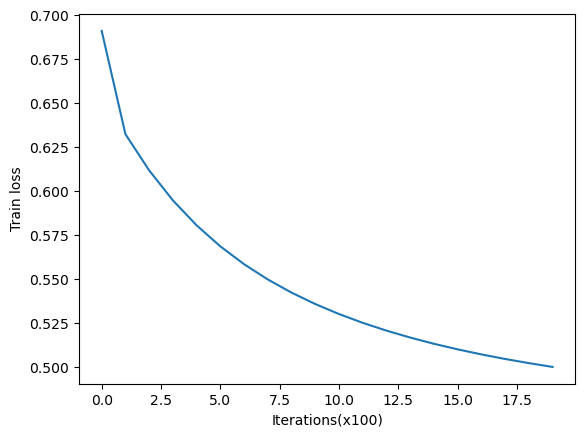

In [12]:
Y_Pred_tr, acc_tr, loss_tr = model_predict(params,train_X,train_Y)
Y_Pred_ts, acc_ts, loss_ts = model_predict(params,test_X,test_Y)
print("Train Accuracy of the model:",acc_tr)
print("Test Accuracy of the model:",acc_ts)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(losses)
plt.xlabel('Iterations(x100)')
plt.ylabel('Train loss');

That completes the assignment on building a single layer neural network. In the next assignment we will design and train a multilayer neural network for multi category classification.